# Project : Investigate a Project (Census and Gun data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#cleaning">Data Cleaning</a></li>    
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## INTRODUCTION

The data comes from the FBI's National Instant Criminal Background Check System. The NICS is used by to determine whether a prospective buyer is eligible to buy firearms or explosives. Gun shops call into this system to ensure that each customer does not have a criminal record or isn’t otherwise ineligible to make a purchase. The data has been supplemented with state level data from census.gov

The dataset used in this notebook is the FBI Gun Datasets, which include two dataset, one is a number of background checks from FBI upon any gun purchases, the other one is a Census Data including various census related variables.

The FBI Gun data inclues a range of different background check types, to name a few, 'permit', 'permit_recheck', 'handgun', 'long_gun', 'multiple'(purchasing more than one gun per background check). For each month, each state, there's a data point consisting all the above mentioned variables. Among all the variables, only the 'totals' variable will be used here, which means the total number of all the various background checks in each state and month.

This analysis will try to explore the following questions:

  1. What is the overall trend over time of firearms purchases?       
  2. Which states have had the highest growth in firearms registrations?
  3. What census data is most associated with firearms registration?

In [69]:
#importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<a id="wrangling"></a>   
## DATA WRANGLING


In [70]:
#importing the data using pandas 
gun_data = pd.read_csv('gun_data.csv')
census_data = pd.read_csv('U.S. Census Data.csv')

In [71]:
#inspecting the data
gun_data.head(3)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394


In [72]:
census_data.head(3)

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%


In [73]:
gun_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

In [74]:
census_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            80 non-null     object
 1   Fact Note       28 non-null     object
 2   Alabama         65 non-null     object
 3   Alaska          65 non-null     object
 4   Arizona         65 non-null     object
 5   Arkansas        65 non-null     object
 6   California      65 non-null     object
 7   Colorado        65 non-null     object
 8   Connecticut     65 non-null     object
 9   Delaware        65 non-null     object
 10  Florida         65 non-null     object
 11  Georgia         65 non-null     object
 12  Hawaii          65 non-null     object
 13  Idaho           65 non-null     object
 14  Illinois        65 non-null     object
 15  Indiana         65 non-null     object
 16  Iowa            65 non-null     object
 17  Kansas          65 non-null     object
 18  Kentucky    

In [75]:
gun_data.shape, census_data.shape

((12485, 27), (85, 52))

In [76]:
#checking for null values in gun_data
gun_data.isnull().sum()

month                            0
state                            0
permit                          24
permit_recheck               11385
handgun                         20
long_gun                        19
other                         6985
multiple                         0
admin                           23
prepawn_handgun               1943
prepawn_long_gun              1945
prepawn_other                 7370
redemption_handgun            1940
redemption_long_gun           1941
redemption_other              7370
returned_handgun             10285
returned_long_gun            10340
returned_other               10670
rentals_handgun              11495
rentals_long_gun             11660
private_sale_handgun          9735
private_sale_long_gun         9735
private_sale_other            9735
return_to_seller_handgun     10010
return_to_seller_long_gun     9735
return_to_seller_other       10230
totals                           0
dtype: int64

In [77]:
#checking for duplicate in gun_data
gun_data.duplicated().sum()

0

In [78]:
#using describe to understand the data
census_data.describe()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
count,80,28,65,65,65,65,65,65,65,65,...,65,65,65,65,65,65,65,65,65,65
unique,80,15,65,64,64,64,63,64,63,64,...,65,64,64,64,63,65,65,64,65,64
top,"Median value of owner-occupied housing units, ...",(c),"316,984",7.30%,50.30%,50.90%,6.80%,3.30%,5.70%,51.60%,...,42418,0.048,50.40%,2.50%,"625,741",23.20%,"""53""",1.50%,6.70%,7.10%
freq,1,6,1,2,2,2,2,2,2,2,...,1,2,2,2,2,1,1,2,1,2


In [79]:
gun_data.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12461.000000,1100.000000,12465.000000,12466.000000,5500.000000,12485.000000,12462.000000,10542.000000,10540.000000,5115.000000,...,1815.000000,990.000000,825.000000,2750.000000,2750.000000,2750.000000,2475.000000,2750.000000,2255.000000,12485.000000
mean,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,0.165591,...,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911
std,23752.338269,9224.200609,8618.584060,9309.846140,1349.478273,783.185073,604.814818,10.907756,16.468028,1.057105,...,4.386296,0.634503,0.671649,71.216021,54.253090,4.467843,1.446568,1.528223,0.427363,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,865.000000,2078.250000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,518.000000,0.000000,3059.000000,5122.000000,121.000000,125.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,4272.000000,0.000000,7280.000000,10380.750000,354.000000,301.000000,0.000000,5.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


Text(0, 0.5, 'Permit')

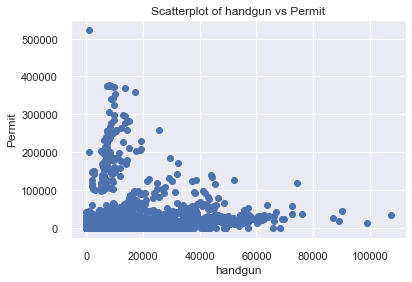

In [80]:
plt.scatter(x = 'handgun', y = 'permit', data= gun_data);
plt.title('Scatterplot of handgun vs Permit')
plt.xlabel('handgun')
plt.ylabel('Permit')

Text(0, 0.5, 'Permit')

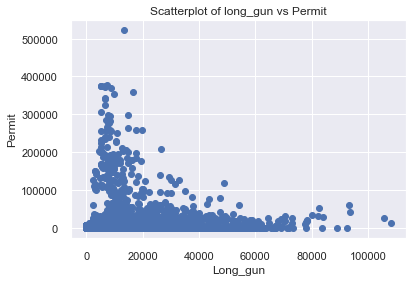

In [81]:
plt.scatter(x = 'long_gun', y = 'permit', data= gun_data);
plt.title('Scatterplot of long_gun vs Permit')
plt.xlabel('Long_gun')
plt.ylabel('Permit')

Text(0, 0.5, 'Permit')

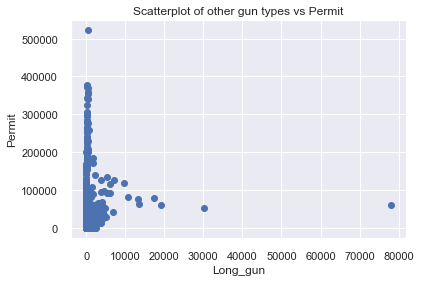

In [82]:
plt.scatter(x = 'other', y = 'permit', data= gun_data);
plt.title('Scatterplot of other gun types vs Permit')
plt.xlabel('Long_gun')
plt.ylabel('Permit')

In [83]:
#Checking for null and duplicated values in census_data
census_data.isnull().sum()

Fact               5
Fact Note         57
Alabama           20
Alaska            20
Arizona           20
Arkansas          20
California        20
Colorado          20
Connecticut       20
Delaware          20
Florida           20
Georgia           20
Hawaii            20
Idaho             20
Illinois          20
Indiana           20
Iowa              20
Kansas            20
Kentucky          20
Louisiana         20
Maine             20
Maryland          20
Massachusetts     20
Michigan          20
Minnesota         20
Mississippi       20
Missouri          20
Montana           20
Nebraska          20
Nevada            20
New Hampshire     20
New Jersey        20
New Mexico        20
New York          20
North Carolina    20
North Dakota      20
Ohio              20
Oklahoma          20
Oregon            20
Pennsylvania      20
Rhode Island      20
South Carolina    20
South Dakota      20
Tennessee         20
Texas             20
Utah              20
Vermont           20
Virginia     

In [84]:
census_data.duplicated().sum()

3

### General Properties
NICS: This data set consists of 27 columns and 12485 rows. It provides detailed info about the total number of background checks by the FBI, based on month and state , and info about firearms transaction based on firearm type.

       - Data types: All the data are saved correctly except the 'month' column that is saved as string. 
       - Duplicates: The data set contains no duplicates. 
       - Missing values: 23 of the 27 columns contain missing data. 

Census: This data set consists of 52 columns and 85 rows. It provides detailed info about demographic data over the 50 US states.

       - Data types: All the columns are saved as string 
       - Duplicates: there are 3 duplicate rows
       - Missing values: Every columns has missing values.

<a id='cleaning'></a>
## Data Cleaning


In this part of the report I will remove and fix the duplicates and incomplete data within both data sets:

     - filling in missing values with mean in NICS data set 
     - removing duplicates and rows containing Nan values in Census data set
     - removing Fact Note column in Census data set, as it isn't necessary for the analysis
     - transposing the census data to have the data appear in the way I want it for my visualization
In the next cell I will use the fillna method to replace the missing values in NICS data set.

We need to check the state that is not in both data. We are store the state in both data into a new listand check for
such state using a loop

In [85]:
census_state = census_data.columns[2:]
census_state

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object')

In [86]:
gun_state = gun_data['state'].unique()
gun_state

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Guam', 'Hawaii', 'Idaho', 'Illinois',
       'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine',
       'Mariana Islands', 'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska',
       'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virgin Islands', 'Virginia', 'Washington', 'West Virginia',
       'Wisconsin', 'Wyoming'], dtype=object)

In [87]:
#loop to check the state in both dataset
for a in gun_state:
    if a not in census_state:
        print(a)

District of Columbia
Guam
Mariana Islands
Puerto Rico
Virgin Islands


We are going to use this results in later part of the project

In [88]:
# replacing missing values

gun_data.fillna(gun_data.mean(), inplace = True, axis = 0)

In [89]:
#checking if are null values
gun_data.isnull().sum()

month                        0
state                        0
permit                       0
permit_recheck               0
handgun                      0
long_gun                     0
other                        0
multiple                     0
admin                        0
prepawn_handgun              0
prepawn_long_gun             0
prepawn_other                0
redemption_handgun           0
redemption_long_gun          0
redemption_other             0
returned_handgun             0
returned_long_gun            0
returned_other               0
rentals_handgun              0
rentals_long_gun             0
private_sale_handgun         0
private_sale_long_gun        0
private_sale_other           0
return_to_seller_handgun     0
return_to_seller_long_gun    0
return_to_seller_other       0
totals                       0
dtype: int64

In [90]:
# removing duplicates 
census_data.drop_duplicates(inplace = True)

In [91]:
# checking for duplicates
census_data.duplicated().sum()

0

In [92]:
#deleting the fact note data from the census data
del census_data['Fact Note']

In [93]:
census_data.head()

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)","4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...","4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936","18,804,592",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,9.60%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010","4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934","18,801,310",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,5.50%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [94]:
#We will be dropping uncessary rows in the datast
census_data = census_data[:64]
census_data.head()

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)","4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065","20,612,439",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...","4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936","18,804,592",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,9.60%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010","4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934","18,801,310",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,5.50%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [95]:
#converting all the states to floats
states = census_data.columns[1:]
states

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object')

In [96]:
for state in states:
    census_data[state].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')
    census_data[state]=pd.to_numeric(census_data[state], downcast='float', errors='ignore')

In [97]:
census_data.head()

,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",4863300.0,741894.0,6931071.0,2988248.0,39250016.0,5540545.0,3576452.0,952065.0,20612440.0,...,865454.0,6651194.0,27862596.0,3051217.0,624594.0,8411808.0,7288000.0,1831102.0,5778708.0,585501.0
1,"Population estimates base, April 1, 2010, (V2...",4780131.0,710249.0,6392301.0,2916025.0,37254520.0,5029324.0,3574114.0,897936.0,18804592.0,...,814195.0,6346298.0,25146100.0,2763888.0,625741.0,8001041.0,6724545.0,1853011.0,5687289.0,563767.0
2,"Population, percent change - April 1, 2010 (es...",170.0,450.0,840.0,250.0,540.0,1020.0,10.0,600.0,960.0,...,63.0,48.0,1080.0,1040.0,20.0,510.0,840.0,120.0,160.0,390.0
3,"Population, Census, April 1, 2010",4779736.0,710231.0,6392017.0,2915918.0,37253956.0,5029196.0,3574097.0,897934.0,18801310.0,...,814180.0,6346105.0,25145560.0,2763885.0,625741.0,8001024.0,6724540.0,1852994.0,5686986.0,563626.0
4,"Persons under 5 years, percent, July 1, 2016, ...",600.0,730.0,630.0,640.0,630.0,610.0,520.0,580.0,550.0,...,71.0,61.0,720.0,830.0,490.0,610.0,620.0,550.0,580.0,650.0


In [98]:
# set index
census_data.set_index('Fact', inplace = True)

In [99]:
census_data.head()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Fact,,,,,,,,,,,,,,,,,,,,,
"Population estimates, July 1, 2016, (V2016)",4863300.0,741894.0,6931071.0,2988248.0,39250016.0,5540545.0,3576452.0,952065.0,20612440.0,10310371.0,...,865454.0,6651194.0,27862596.0,3051217.0,624594.0,8411808.0,7288000.0,1831102.0,5778708.0,585501.0
"Population estimates base, April 1, 2010, (V2016)",4780131.0,710249.0,6392301.0,2916025.0,37254520.0,5029324.0,3574114.0,897936.0,18804592.0,9688680.0,...,814195.0,6346298.0,25146100.0,2763888.0,625741.0,8001041.0,6724545.0,1853011.0,5687289.0,563767.0
"Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)",170.0,450.0,840.0,250.0,540.0,1020.0,10.0,600.0,960.0,640.0,...,63.0,48.0,1080.0,1040.0,20.0,510.0,840.0,120.0,160.0,390.0
"Population, Census, April 1, 2010",4779736.0,710231.0,6392017.0,2915918.0,37253956.0,5029196.0,3574097.0,897934.0,18801310.0,9687653.0,...,814180.0,6346105.0,25145560.0,2763885.0,625741.0,8001024.0,6724540.0,1852994.0,5686986.0,563626.0
"Persons under 5 years, percent, July 1, 2016, (V2016)",600.0,730.0,630.0,640.0,630.0,610.0,520.0,580.0,550.0,640.0,...,71.0,61.0,720.0,830.0,490.0,610.0,620.0,550.0,580.0,650.0


The neeed to try and make the compatible, the state column is similar in the two dataset but the current problem is that
census data is not quite structured so we can merge the two datasets.
To achieve this we transpose the census data

In [100]:
#transpoing the data
census_data = census_data.T
census_data.head(3)

Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010",...,"Total nonemployer establishments, 2015","All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010"
Alabama,4863300.0,4780131.0,170.0,4779736.0,600.0,640.0,2260.0,2370.0,1610.0,1380.0,...,322025.0,374153.0,203604.0,137630.0,92219.0,272651.0,41943.0,316984.0,944.0,5064533.0
Alaska,741894.0,710249.0,450.0,710231.0,730.0,760.0,2520.0,2640.0,1040.0,770.0,...,55521.0,68032.0,35402.0,22141.0,13688.0,51147.0,7953.0,56091.0,12.0,57064096.0
Arizona,6931071.0,6392301.0,840.0,6392017.0,630.0,710.0,2350.0,2550.0,1690.0,1380.0,...,451951.0,499926.0,245243.0,182425.0,135313.0,344981.0,46780.0,427582.0,563.0,11359408.0


In [101]:
census_data.reset_index(inplace=True)
census_data.head()

Fact,index,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,"Total nonemployer establishments, 2015","All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010"
0,Alabama,4863300.0,4780131.0,170.0,4779736.0,600.0,640.0,2260.0,2370.0,1610.0,...,322025.0,374153.0,203604.0,137630.0,92219.0,272651.0,41943.0,316984.0,944.0,5064533.0
1,Alaska,741894.0,710249.0,450.0,710231.0,730.0,760.0,2520.0,2640.0,1040.0,...,55521.0,68032.0,35402.0,22141.0,13688.0,51147.0,7953.0,56091.0,12.0,57064096.0
2,Arizona,6931071.0,6392301.0,840.0,6392017.0,630.0,710.0,2350.0,2550.0,1690.0,...,451951.0,499926.0,245243.0,182425.0,135313.0,344981.0,46780.0,427582.0,563.0,11359408.0
3,Arkansas,2988248.0,2916025.0,250.0,2915918.0,640.0,680.0,2360.0,2440.0,1630.0,...,198380.0,231959.0,123158.0,75962.0,35982.0,189029.0,25915.0,192988.0,56.0,5203548.0
4,California,39250016.0,37254520.0,540.0,37253956.0,630.0,680.0,2320.0,2500.0,1360.0,...,3206958.0,3548449.0,1852580.0,1320085.0,1619857.0,1819107.0,252377.0,3176341.0,2391.0,15577922.0


In [102]:
#rename the fact and index column
census_data.rename(columns = {'Fact': 'Index', 'index':'State'}, inplace = True)
census_data.head()

Fact,State,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,"Total nonemployer establishments, 2015","All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010"
0,Alabama,4863300.0,4780131.0,170.0,4779736.0,600.0,640.0,2260.0,2370.0,1610.0,...,322025.0,374153.0,203604.0,137630.0,92219.0,272651.0,41943.0,316984.0,944.0,5064533.0
1,Alaska,741894.0,710249.0,450.0,710231.0,730.0,760.0,2520.0,2640.0,1040.0,...,55521.0,68032.0,35402.0,22141.0,13688.0,51147.0,7953.0,56091.0,12.0,57064096.0
2,Arizona,6931071.0,6392301.0,840.0,6392017.0,630.0,710.0,2350.0,2550.0,1690.0,...,451951.0,499926.0,245243.0,182425.0,135313.0,344981.0,46780.0,427582.0,563.0,11359408.0
3,Arkansas,2988248.0,2916025.0,250.0,2915918.0,640.0,680.0,2360.0,2440.0,1630.0,...,198380.0,231959.0,123158.0,75962.0,35982.0,189029.0,25915.0,192988.0,56.0,5203548.0
4,California,39250016.0,37254520.0,540.0,37253956.0,630.0,680.0,2320.0,2500.0,1360.0,...,3206958.0,3548449.0,1852580.0,1320085.0,1619857.0,1819107.0,252377.0,3176341.0,2391.0,15577922.0


In [103]:
census_data.rename(columns = {'index' : 'state'}, inplace=True)

In [104]:
census_data.head()

Fact,State,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,"Total nonemployer establishments, 2015","All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010"
0,Alabama,4863300.0,4780131.0,170.0,4779736.0,600.0,640.0,2260.0,2370.0,1610.0,...,322025.0,374153.0,203604.0,137630.0,92219.0,272651.0,41943.0,316984.0,944.0,5064533.0
1,Alaska,741894.0,710249.0,450.0,710231.0,730.0,760.0,2520.0,2640.0,1040.0,...,55521.0,68032.0,35402.0,22141.0,13688.0,51147.0,7953.0,56091.0,12.0,57064096.0
2,Arizona,6931071.0,6392301.0,840.0,6392017.0,630.0,710.0,2350.0,2550.0,1690.0,...,451951.0,499926.0,245243.0,182425.0,135313.0,344981.0,46780.0,427582.0,563.0,11359408.0
3,Arkansas,2988248.0,2916025.0,250.0,2915918.0,640.0,680.0,2360.0,2440.0,1630.0,...,198380.0,231959.0,123158.0,75962.0,35982.0,189029.0,25915.0,192988.0,56.0,5203548.0
4,California,39250016.0,37254520.0,540.0,37253956.0,630.0,680.0,2320.0,2500.0,1360.0,...,3206958.0,3548449.0,1852580.0,1320085.0,1619857.0,1819107.0,252377.0,3176341.0,2391.0,15577922.0


In [105]:
gun_data.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


<a id='eda'></a>
## Exploratory Data Analysis


### QUESTION 1
What is the overall trend of gun purchases?

Using the totals from the NICS data, we can see what the overall trend of gun sales are from 1998 to 2018

In [106]:
# sum the totals by month
totals = gun_data.groupby("month")["totals"].sum()
totals

month
1998-11      21176
1998-12     870722
1999-01     585974
1999-02     690215
1999-03     741687
            ...   
2017-05    1898840
2017-06    1888266
2017-07    1733308
2017-08    1896457
2017-09    1857226
Name: totals, Length: 227, dtype: int64

<ipython-input-107-1a48e520838e>:2: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

<ipython-input-107-1a48e520838e>:8: UserWarning:

FixedFormatter should only be used together with FixedLocator



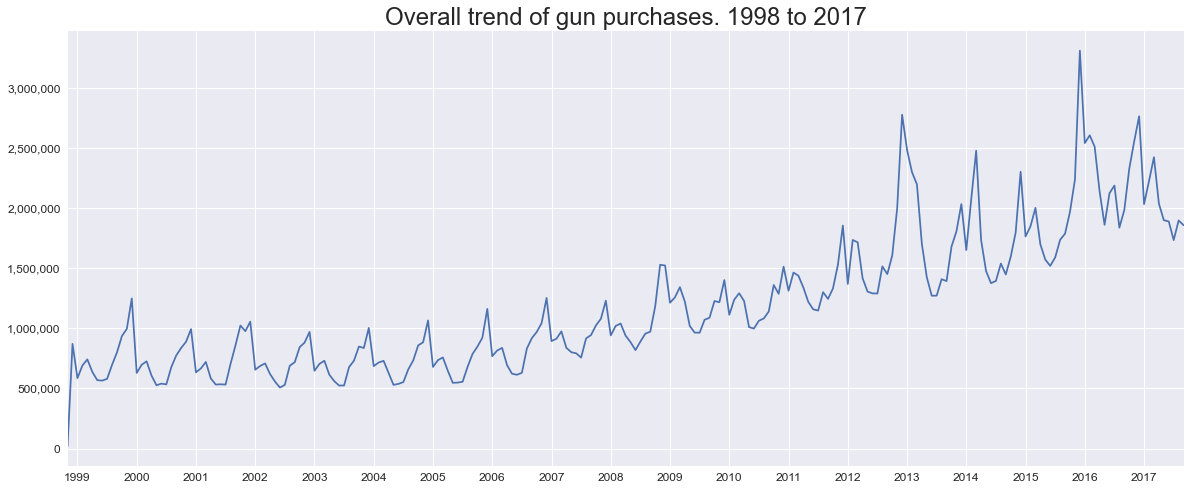

In [107]:
# plot graph
tick_placement = pd.np.arange(2, len(totals), 12);
plt.style.use('seaborn');
ax = totals.plot(figsize=(20,8));


ax.set_title("Overall trend of gun purchases. 1998 to 2017", fontsize=24);
ax.set_yticklabels([ "{0:,.0f}".format(y) for y in ax.get_yticks() ], fontsize=12);
plt.setp(ax.get_xticklabels(), rotation=0, fontsize=12);
ax.set_xticks(tick_placement)
ax.set_xticklabels([ totals.index[i].split("-")[0] for i in tick_placement ]);
ax.set_xlim(0, len(totals) - 1);
ax.set_xlabel("");

>As we can see from the line chart, the number of firearm purchases is increasing over time, having its greatest peak in 2016.
The line graph shows a similar pattern during the ending of each year, i.e. there is always an increase in the last month of each year which is the month of December


### Question 2
Which states have had the highest growth in gun registrations ?

>In order to find which states have had the highest growth in gun registrations, I will create a smaller dataset containing only the columns: years, state and totals. This will allow me to have a more clear view of the data and calculate the growth rate of gun registrations from 1998 to 2021

In [108]:
# converting the month data type from str to datetime object and extracting the year and month 
gun_data['year'] = pd.to_datetime(gun_data['month'])
gun_data['months'] = pd.to_datetime(gun_data['month']).dt.strftime('%m')
gun_data.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals,year,months
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019,2017,09
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303,2017,09
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394,2017,09
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747,2017,09
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506,2017,09


In [109]:
# dropping the month column
gun_data.drop('month', axis = 1, inplace = True)

In [110]:
# creating a small dataset
guns_data = gun_data[['year', 'months','state','totals']]

In [111]:
guns_data.head()

,year,months,state,totals
0,2017,09,Alabama,32019
1,2017,09,Alaska,6303
2,2017,09,Arizona,28394
3,2017,09,Arkansas,17747
4,2017,09,California,123506


In [112]:
guns_data_2021 = guns_data.query('year == "2017"')
guns_data_2021

,year,months,state,totals
0,2017,09,Alabama,32019
1,2017,09,Alaska,6303
2,2017,09,Arizona,28394
3,2017,09,Arkansas,17747
4,2017,09,California,123506
...,...,...,...,...
490,2017,01,Virginia,37369
491,2017,01,Washington,46027
492,2017,01,West Virginia,15772
493,2017,01,Wisconsin,46775


In [113]:
guns_data_1998 = guns_data.query('year == "1998"')
guns_data_1998

,year,months,state,totals
12375,1998,12,Alabama,35506
12376,1998,12,Alaska,3840
12377,1998,12,Arizona,17074
12378,1998,12,Arkansas,21163
12379,1998,12,California,65344
...,...,...,...,...
12480,1998,11,Virginia,24
12481,1998,11,Washington,361
12482,1998,11,West Virginia,408
12483,1998,11,Wisconsin,241


In [114]:
# groupby state and gun totals for 2021 and 1998 and renaming the colon totals to represent the totals of firearm check 2021 and 1998
guntotal_2017 = guns_data_2021.groupby(['state'])['totals'].sum().reset_index()
guntotal_2017

,state,totals
0,Alabama,336763
1,Alaska,56902
2,Arizona,279553
3,Arkansas,161694
4,California,1167528
5,Colorado,345559
6,Connecticut,138789
7,Delaware,36826
8,District of Columbia,754
9,Florida,912765


In [115]:
guntotal_1998 = guns_data_1998.groupby(['state'])['totals'].sum().reset_index()
guntotal_1998

,state,totals
0,Alabama,36568
1,Alaska,3985
2,Arizona,17453
3,Arkansas,21752
4,California,67445
5,Colorado,23798
6,Connecticut,6870
7,Delaware,2135
8,District of Columbia,0
9,Florida,32341


In [116]:
guntotal_2017.rename({'totals':'2017_totals'}, axis = 1, inplace = True)
guntotal_1998.rename({'totals':'1998_totals'}, axis = 1, inplace = True)

In [117]:
# merging the two datasets 
gunstotal = guntotal_2017.merge(guntotal_1998, on = 'state', how = 'inner')
gunstotal

,state,2017_totals,1998_totals
0,Alabama,336763,36568
1,Alaska,56902,3985
2,Arizona,279553,17453
3,Arkansas,161694,21752
4,California,1167528,67445
5,Colorado,345559,23798
6,Connecticut,138789,6870
7,Delaware,36826,2135
8,District of Columbia,754,0
9,Florida,912765,32341


In [118]:
# finding the highest growth source: https://stackoverflow.com/questions/58286715/find-highest-growth-using-python-pandas

gunstotal['growth rate'] = (gunstotal['2017_totals'] / gunstotal['1998_totals']) -1
gunstotal = gunstotal.sort_values(['growth rate'], ascending = False)
gunstotal

,state,2017_totals,1998_totals,growth rate
21,Mariana Islands,106,0,inf
8,District of Columbia,754,0,inf
49,Virgin Islands,925,0,inf
11,Guam,1372,9,151.444444
18,Kentucky,3417976,31869,106.250808
23,Massachusetts,154161,1443,105.833680
10,Georgia,378921,3819,98.219953
25,Minnesota,529302,12116,42.686200
31,New Hampshire,95057,2442,37.925880
51,Washington,419522,12002,33.954341


In [119]:
gunstotal = gunstotal.drop(labels = [8,21,49], axis = 0)
gunstotal

,state,2017_totals,1998_totals,growth rate
11,Guam,1372,9,151.444444
18,Kentucky,3417976,31869,106.250808
23,Massachusetts,154161,1443,105.833680
10,Georgia,378921,3819,98.219953
25,Minnesota,529302,12116,42.686200
31,New Hampshire,95057,2442,37.925880
51,Washington,419522,12002,33.954341
43,South Carolina,295532,9565,29.897229
9,Florida,912765,32341,27.223153
14,Illinois,1163945,41477,27.062420


In [120]:
# states with highest growth in gun registrations 
guntotal_df = gunstotal[['state', 'growth rate']].head(10)

In [121]:
guntotal_df

,state,growth rate
11,Guam,151.444444
18,Kentucky,106.250808
23,Massachusetts,105.833680
10,Georgia,98.219953
25,Minnesota,42.686200
31,New Hampshire,37.925880
51,Washington,33.954341
43,South Carolina,29.897229
9,Florida,27.223153
14,Illinois,27.062420


Text(0.5, 1.0, 'Top 10 states with gun registration over the period')

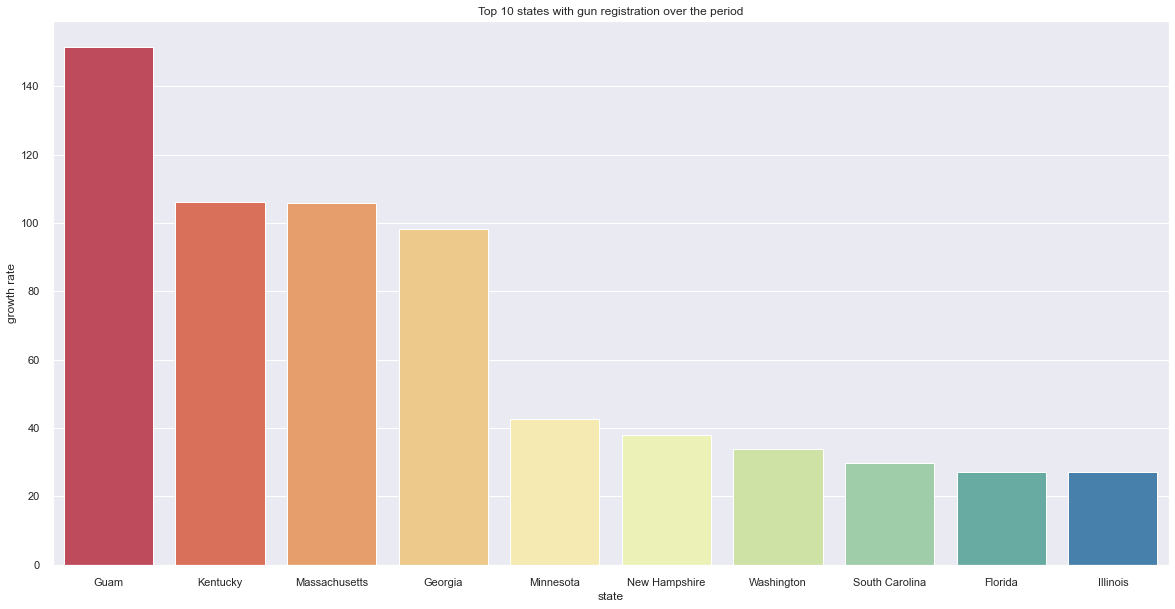

In [122]:
sns.set(style = 'darkgrid')
plt.figure(figsize = (20,10))
sns.barplot(x = "state", y='growth rate', data = guntotal_df, palette = "Spectral")
plt.title('Top 10 states with gun registration over the period')

>Guam state has the highest growth in gun registration, with Illinois coming in second and Georgia coming in third.



### Question 3
What census data is most associated with firearms registrations ?

>The census dataset only provides census data for the interval between 2010 and 2016. In order to compare the data and see the association relationship, I will have to filter the gun dataset accordingly and create a smaller subset. After I will merge the gun and census data and calculate the correlation between all census data with gun registration totals, a single and dependant variable,to see what census data are the most associated with firearms registrations.

In [123]:
census_data

Fact,State,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,"Total nonemployer establishments, 2015","All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010"
0,Alabama,4863300.0,4780131.0,170.0,4779736.0,600.0,640.0,2260.0,2370.0,1610.0,...,322025.0,374153.0,203604.0,137630.0,92219.0,272651.0,41943.0,316984.0,944.0,5064533.0
1,Alaska,741894.0,710249.0,450.0,710231.0,730.0,760.0,2520.0,2640.0,1040.0,...,55521.0,68032.0,35402.0,22141.0,13688.0,51147.0,7953.0,56091.0,12.0,57064096.0
2,Arizona,6931071.0,6392301.0,840.0,6392017.0,630.0,710.0,2350.0,2550.0,1690.0,...,451951.0,499926.0,245243.0,182425.0,135313.0,344981.0,46780.0,427582.0,563.0,11359408.0
3,Arkansas,2988248.0,2916025.0,250.0,2915918.0,640.0,680.0,2360.0,2440.0,1630.0,...,198380.0,231959.0,123158.0,75962.0,35982.0,189029.0,25915.0,192988.0,56.0,5203548.0
4,California,39250016.0,37254520.0,540.0,37253956.0,630.0,680.0,2320.0,2500.0,1360.0,...,3206958.0,3548449.0,1852580.0,1320085.0,1619857.0,1819107.0,252377.0,3176341.0,2391.0,15577922.0
5,Colorado,5540545.0,5029324.0,1020.0,5029196.0,610.0,680.0,2280.0,2440.0,1340.0,...,480847.0,547352.0,284554.0,194508.0,85849.0,442365.0,51722.0,469524.0,485.0,10364189.0
6,Connecticut,3576452.0,3574114.0,10.0,3574097.0,520.0,570.0,2110.0,2290.0,1610.0,...,272809.0,326693.0,187845.0,106678.0,56113.0,259614.0,31056.0,281182.0,7381.0,484236.0
7,Delaware,952065.0,897936.0,600.0,897934.0,580.0,620.0,2150.0,2290.0,1750.0,...,60734.0,73418.0,38328.0,23964.0,14440.0,54782.0,7206.0,60318.0,4608.0,194854.0
8,Florida,20612440.0,18804592.0,960.0,18801310.0,550.0,570.0,2010.0,2130.0,1990.0,...,2040339.0,2100187.0,1084885.0,807817.0,926112.0,1121749.0,185756.0,1846686.0,3506.0,5362476.0
9,Georgia,10310371.0,9688680.0,640.0,9687653.0,640.0,710.0,2440.0,2570.0,1310.0,...,870897.0,929864.0,480578.0,376506.0,371588.0,538893.0,96787.0,800585.0,1684.0,5751349.0


In [124]:
guns_data

,year,months,state,totals
0,2017,09,Alabama,32019
1,2017,09,Alaska,6303
2,2017,09,Arizona,28394
3,2017,09,Arkansas,17747
4,2017,09,California,123506
...,...,...,...,...
12480,1998,11,Virginia,24
12481,1998,11,Washington,361
12482,1998,11,West Virginia,408
12483,1998,11,Wisconsin,241


In [125]:
#filtering the gun dataset
guns_data1 = guns_data[(guns_data['year'] >= '2010') & (guns_data['year'] <='2017')]

In [126]:
guns_data1

,year,months,state,totals
0,2017,09,Alabama,32019
1,2017,09,Alaska,6303
2,2017,09,Arizona,28394
3,2017,09,Arkansas,17747
4,2017,09,California,123506
...,...,...,...,...
5110,2010,01,Virginia,22145
5111,2010,01,Washington,27184
5112,2010,01,West Virginia,11693
5113,2010,01,Wisconsin,12734


In [127]:
# calculating the total of firearm registration for the period 2010-2017
guns_data_new = guns_data.groupby('state')['totals'].sum().reset_index()

In [128]:
guns_data_new

,state,totals
0,Alabama,6706079
1,Alaska,1137643
2,Arizona,4425714
3,Arkansas,3752633
4,California,19014063
5,Colorado,6058482
6,Connecticut,3168126
7,Delaware,491369
8,District of Columbia,5601
9,Florida,11695777


In [129]:
census_data.rename(columns = {'State':'state'}, inplace = True)
census_data

Fact,state,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,"Total nonemployer establishments, 2015","All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010"
0,Alabama,4863300.0,4780131.0,170.0,4779736.0,600.0,640.0,2260.0,2370.0,1610.0,...,322025.0,374153.0,203604.0,137630.0,92219.0,272651.0,41943.0,316984.0,944.0,5064533.0
1,Alaska,741894.0,710249.0,450.0,710231.0,730.0,760.0,2520.0,2640.0,1040.0,...,55521.0,68032.0,35402.0,22141.0,13688.0,51147.0,7953.0,56091.0,12.0,57064096.0
2,Arizona,6931071.0,6392301.0,840.0,6392017.0,630.0,710.0,2350.0,2550.0,1690.0,...,451951.0,499926.0,245243.0,182425.0,135313.0,344981.0,46780.0,427582.0,563.0,11359408.0
3,Arkansas,2988248.0,2916025.0,250.0,2915918.0,640.0,680.0,2360.0,2440.0,1630.0,...,198380.0,231959.0,123158.0,75962.0,35982.0,189029.0,25915.0,192988.0,56.0,5203548.0
4,California,39250016.0,37254520.0,540.0,37253956.0,630.0,680.0,2320.0,2500.0,1360.0,...,3206958.0,3548449.0,1852580.0,1320085.0,1619857.0,1819107.0,252377.0,3176341.0,2391.0,15577922.0
5,Colorado,5540545.0,5029324.0,1020.0,5029196.0,610.0,680.0,2280.0,2440.0,1340.0,...,480847.0,547352.0,284554.0,194508.0,85849.0,442365.0,51722.0,469524.0,485.0,10364189.0
6,Connecticut,3576452.0,3574114.0,10.0,3574097.0,520.0,570.0,2110.0,2290.0,1610.0,...,272809.0,326693.0,187845.0,106678.0,56113.0,259614.0,31056.0,281182.0,7381.0,484236.0
7,Delaware,952065.0,897936.0,600.0,897934.0,580.0,620.0,2150.0,2290.0,1750.0,...,60734.0,73418.0,38328.0,23964.0,14440.0,54782.0,7206.0,60318.0,4608.0,194854.0
8,Florida,20612440.0,18804592.0,960.0,18801310.0,550.0,570.0,2010.0,2130.0,1990.0,...,2040339.0,2100187.0,1084885.0,807817.0,926112.0,1121749.0,185756.0,1846686.0,3506.0,5362476.0
9,Georgia,10310371.0,9688680.0,640.0,9687653.0,640.0,710.0,2440.0,2570.0,1310.0,...,870897.0,929864.0,480578.0,376506.0,371588.0,538893.0,96787.0,800585.0,1684.0,5751349.0


In [130]:
#merging gun and census data to calculate correlation 
df_new= census_data.merge(guns_data_new, on = 'state', how = 'inner')
df_new

,state,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",totals
0,Alabama,4863300.0,4780131.0,170.0,4779736.0,600.0,640.0,2260.0,2370.0,1610.0,...,374153.0,203604.0,137630.0,92219.0,272651.0,41943.0,316984.0,944.0,5064533.0,6706079
1,Alaska,741894.0,710249.0,450.0,710231.0,730.0,760.0,2520.0,2640.0,1040.0,...,68032.0,35402.0,22141.0,13688.0,51147.0,7953.0,56091.0,12.0,57064096.0,1137643
2,Arizona,6931071.0,6392301.0,840.0,6392017.0,630.0,710.0,2350.0,2550.0,1690.0,...,499926.0,245243.0,182425.0,135313.0,344981.0,46780.0,427582.0,563.0,11359408.0,4425714
3,Arkansas,2988248.0,2916025.0,250.0,2915918.0,640.0,680.0,2360.0,2440.0,1630.0,...,231959.0,123158.0,75962.0,35982.0,189029.0,25915.0,192988.0,56.0,5203548.0,3752633
4,California,39250016.0,37254520.0,540.0,37253956.0,630.0,680.0,2320.0,2500.0,1360.0,...,3548449.0,1852580.0,1320085.0,1619857.0,1819107.0,252377.0,3176341.0,2391.0,15577922.0,19014063
5,Colorado,5540545.0,5029324.0,1020.0,5029196.0,610.0,680.0,2280.0,2440.0,1340.0,...,547352.0,284554.0,194508.0,85849.0,442365.0,51722.0,469524.0,485.0,10364189.0,6058482
6,Connecticut,3576452.0,3574114.0,10.0,3574097.0,520.0,570.0,2110.0,2290.0,1610.0,...,326693.0,187845.0,106678.0,56113.0,259614.0,31056.0,281182.0,7381.0,484236.0,3168126
7,Delaware,952065.0,897936.0,600.0,897934.0,580.0,620.0,2150.0,2290.0,1750.0,...,73418.0,38328.0,23964.0,14440.0,54782.0,7206.0,60318.0,4608.0,194854.0,491369
8,Florida,20612440.0,18804592.0,960.0,18801310.0,550.0,570.0,2010.0,2130.0,1990.0,...,2100187.0,1084885.0,807817.0,926112.0,1121749.0,185756.0,1846686.0,3506.0,5362476.0,11695777
9,Georgia,10310371.0,9688680.0,640.0,9687653.0,640.0,710.0,2440.0,2570.0,1310.0,...,929864.0,480578.0,376506.0,371588.0,538893.0,96787.0,800585.0,1684.0,5751349.0,7209942


In [131]:
# source: https://stackoverflow.com/questions/52670115/pandas-df-corr-one-variable-across-multiple-cols
corr = df_new.corr()[['totals']][:-1].sort_values(by='totals', ascending = False)
corr

,totals
"Total manufacturers shipments, 2012 ($1,000)",0.684760
"Veterans, 2011-2015",0.673238
"Households, 2011-2015",0.657333
"Housing units, July 1, 2016, (V2016)",0.657252
"Housing units, April 1, 2010",0.655460
...,...
"Per capita income in past 12 months (in 2015 dollars), 2011-2015",-0.190280
"Median household income (in 2015 dollars), 2011-2015",-0.214555
"Mean travel time to work (minutes), workers age 16 years+, 2011-2015",-0.223687
"Total retail sales per capita, 2012",-0.293659


In [132]:
# top 10 positive correlations
corr.head(10)

,totals
"Total manufacturers shipments, 2012 ($1,000)",0.684760
"Veterans, 2011-2015",0.673238
"Households, 2011-2015",0.657333
"Housing units, July 1, 2016, (V2016)",0.657252
"Housing units, April 1, 2010",0.655460
"Veteran-owned firms, 2012",0.650293
"Population estimates, July 1, 2016, (V2016)",0.649697
"Population estimates base, April 1, 2010, (V2016)",0.649583
"Population, Census, April 1, 2010",0.649580
"Nonminority-owned firms, 2012",0.646606


In [133]:
import plotly.express as px
fig = px.imshow(corr, height = 1300)
fig.update_layout(title = 'Heatmap of census data correlation with firearm registrations', title_x = 1.0)
fig.show()

>'Total manufacturers shipments 2012' represent the most associated census data with firearm registrations, followed by 'Veterans 2011-2015' and 'Housing Units, July 1, 2016'.

## Conclusion

#### Main findings

- 1.What is the overall trend over time of firearms purchases?

>The number of firearm purchases has increased over time. Visually, we see that the firearm purchases follow seasonal trends, typically peaking in December. We also see that from 1998 to 2012, the growth pattern was uniform and an unpreented spike in 2013.The year with the highest guns sold was 2016.


- 2.Which states have had the highest growth in firearms registrations?

>The top 5 states that has the highest growth in gun registrations from 1998 to 2017 are:

          1. Guam: 151.444444
          2. Kentucky : 106.250808
          3. Massachusetts : 105.833680
          4. Georgia : 98.219953
          5. Minnesota : 42.686200

- 3. What census data is most associated with firearms registration ?

       According to PEARSON correlation coeficient the census data most associated with firearms registration is:

    1. 'Total manufacturers shipments, 2012 (1,000)' correlation coefficient: 0.684760
    2.  'Veterans, 2011-2015:0.673238'
    3. 'Households, 2011-2015 : 0.657333'

#### Limitations
- One of the main limitation is the lack of census data that prevented more detailed analysis: the census data is available only for the period 2010 - 2017. 
- Missing data in the NICS dataset that were I replaced with mean.

#### References:
- https://stackoverflow.com/questions/42381639/how-do-i-transpose-dataframe-in-pandas-without-index
- https://stackoverflow.com/questions/52670115/pandas-df-corr-one-variable-across-multiple-cols
- https://stackoverflow.com/questions/58286715/find-highest-growth-using-python-pandas

In [134]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295